# Математическая статистика. Лабораторная работа №2. Васильев Н. А.

## Задание 1

Построим доверительный интервал для отношения дисперсий \\( τ = \frac{σ_1^2}{σ_2^2} \\) с известными \\( μ_1=0, μ_2=0 \\) и \\( σ_1^2=2, σ_2^2=1 \\).

Воспользуемся формулой:
$$
\frac{n_2\sum_{i=1}^{n_1}(\mathrm{X}_{1,i}-\mu_1)^2}{n_1\sum_{i=1}^{n_2}(\mathrm{X}_{1,i}-\mu_2)^2} ⋅ \frac{σ_2^2}{σ_1^2}
$$

Рассмотрим две независимые выборки из нормальных распределений:
$$
X_1^{(1)}, \ldots, X_{n_1}^{(1)} \sim \mathcal{N}(\mu_1, \sigma_1^2), \quad
X_1^{(2)}, \ldots, X_{n_2}^{(2)} \sim \mathcal{N}(\mu_2, \sigma_2^2),
$$
где \\( \mu_1, \mu_2 \\) — известны.

Наша цель — построить доверительный интервал для параметра
$$
\tau = \frac{\sigma_1^2}{\sigma_2^2}.
$$

Несмещённые оценки дисперсий при известных средних:
$$
S_1^2 = \frac{1}{n_1} \sum_{i=1}^{n_1} (X_i^{(1)} - \mu_1)^2, \quad
S_2^2 = \frac{1}{n_2} \sum_{i=1}^{n_2} (X_i^{(2)} - \mu_2)^2.
$$

Рассмотрим величину:
$$
F = \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} = \frac{S_1^2}{S_2^2} \cdot \frac{\sigma_2^2}{\sigma_1^2}.
$$

Так как выборки независимы и из нормального распределения, то \\( F \sim F_{n_1, n_2} \\) — распределение Фишера с \\( n_1 \\) и \\(n_2\\) степенями свободы.

С учётом уровня значимости $\alpha$, найдём критические значения распределения Фишера:
$$
f_{\alpha/2} = F^{-1}_{n_1, n_2}(\alpha/2), \quad f_{1 - \alpha/2} = F^{-1}_{n_1, n_2}(1 - \alpha/2).
$$

С вероятностью $1 - \alpha$ справедливо:
$$
f_{\alpha/2} \leq \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq f_{1 - \alpha/2}.
$$

Домножая на $\frac{\sigma_1^2}{\sigma_2^2}$, получаем:
$$
\frac{S_1^2}{S_2^2} \cdot \frac{1}{f_{1 - \alpha/2}} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{S_1^2}{S_2^2} \cdot \frac{1}{f_{\alpha/2}}.
$$

Таким образом, доверительный интервал уровня $1 - \alpha$ для параметра $\tau$ имеет вид:
$$
\left[
\frac{S_1^2}{S_2^2} \cdot \frac{1}{f_{1 - \alpha/2}}, \quad
\frac{S_1^2}{S_2^2} \cdot \frac{1}{f_{\alpha/2}}
\right].
$$


       n  Покрытие  Средняя ширина
0     10     0.961        8.650003
1     25     0.956        3.831226
2    100     0.954        1.649593
3   1000     0.953        0.498357
4  10000     0.950        0.156687


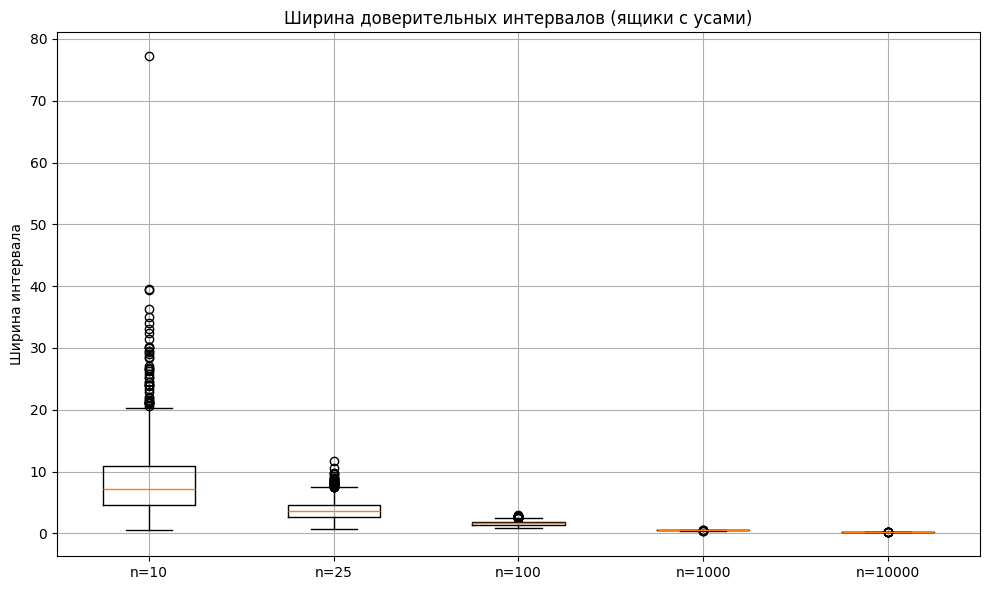

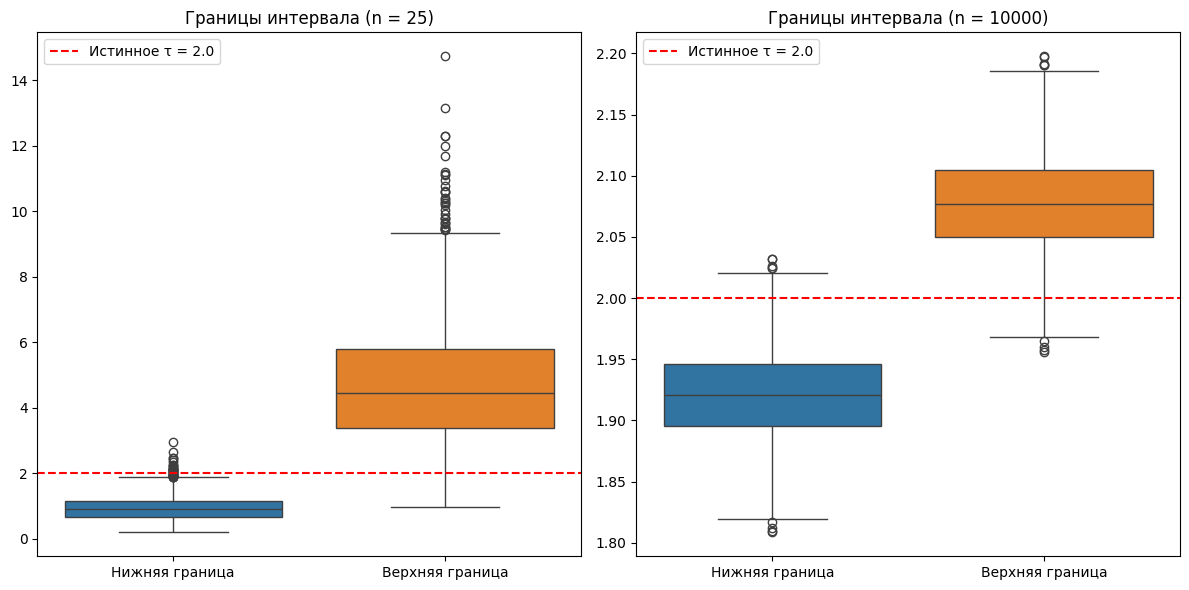

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

mu1, mu2 = 0, 0
sigma1_sq, sigma2_sq = 2, 1
tau_true = sigma1_sq / sigma2_sq
alpha = 0.05
n_experiments = 1000

# Размеры выборки для анализа
sample_sizes = [10, 25, 100, 1000, 10000]

results = []

def run_experiment(n):
    coverages = 0
    lowers, uppers, widths = [], [], []

    for _ in range(n_experiments):
        # Генерация данных
        X1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n)
        X2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n)

        # Расчёт оценок дисперсий
        S1_sq = np.sum((X1 - mu1) ** 2) / n
        S2_sq = np.sum((X2 - mu2) ** 2) / n
        tau_hat = S1_sq / S2_sq

        # Квантили F-распределения
        F_lower = f.ppf(alpha / 2, n, n)
        F_upper = f.ppf(1 - alpha / 2, n, n)

        # Доверительный интервал
        ci_lower = tau_hat / F_upper
        ci_upper = tau_hat / F_lower

        lowers.append(ci_lower)
        uppers.append(ci_upper)
        widths.append(ci_upper - ci_lower)

        if ci_lower <= tau_true <= ci_upper:
            coverages += 1

    coverage_prob = coverages / n_experiments
    bounds_df = pd.DataFrame({"Нижняя граница": lowers, "Верхняя граница": uppers})

    return coverage_prob, np.mean(widths), bounds_df, widths

for n in sample_sizes:
    coverage, avg_width, bounds_df, widths = run_experiment(n)
    results.append({
        "n": n,
        "Покрытие": coverage,
        "Средняя ширина": avg_width,
        "Границы": bounds_df,
        "Ширины": widths
    })

df_summary = pd.DataFrame({
    "n": [r["n"] for r in results],
    "Покрытие": [r["Покрытие"] for r in results],
    "Средняя ширина": [r["Средняя ширина"] for r in results]
})

print(df_summary)

plt.figure(figsize=(10, 6))
plt.boxplot([r["Ширины"] for r in results], tick_labels=[f'n={r["n"]}' for r in results])
plt.title("Ширина доверительных интервалов (ящики с усами)")
plt.ylabel("Ширина интервала")
plt.grid(True)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=results[1]["Границы"], ax=ax1)
ax1.axhline(tau_true, color='red', linestyle='--', label=f"Истинное τ = {tau_true}")
ax1.set_title("Границы интервала (n = 25)")
ax1.legend()

sns.boxplot(data=results[-1]["Границы"], ax=ax2)
ax2.axhline(tau_true, color='red', linestyle='--', label=f"Истинное τ = {tau_true}")
ax2.set_title("Границы интервала (n = 10000)")
ax2.legend()

plt.tight_layout()
plt.show()


### Результаты:

При малых выборках (например, $n=10$) доля интервалов, содержащих истинное значение $\tau = 2$, может отклоняться от номинального уровня $95\%$. Однако по мере увеличения $n$ покрытие стремится к 0.95, как и предсказывает теория.

При увеличении объема выборки доверительные интервалы становятся уже. Это связано с уменьшением разброса оценки отношения дисперсий и тем, что статистика $F$ стабилизируется при больших $n$.

С ростом объема выборки доверительные интервалы становятся как точнее (уже), так и стабильнее (покрытие ближе к заданному уровню).


## Задание 2

Рассмотрим случайную выборку:
$$
X_1, \dots, X_n \sim \text{Exp}(\lambda = 1)
$$

Для экспоненциального распределения:
$$
F(x) = 1 - e^{-\lambda x}
$$

Находим медиану \\( m \\) из уравнения \\( F(m) = 0.5 \\):
$$
1 - e^{-\lambda m} = 0.5 \Rightarrow m = \frac{\ln 2}{\lambda} = \ln 2 \approx 0.6931
$$

Согласно ЦПТ, если \\( X_1, ..., X_n \\) — независимые одинаково распределённые, то для выборочной медианы \\( \tilde{X} \\) верно:

$$
\sqrt{n}(\tilde{X}-m)\xrightarrow{d}\mathcal{N}\left(  0,\frac{1}{4f(m)^2}\right)
$$

где \\( f(m) \\) — значение плотности распределения в точке медианы.

Для экспоненциального распределения:

$$
f(x) = \lambda e^{-\lambda x}, \quad f(m) = e^{-\ln 2} = \frac{1}{2}
$$

Следовательно, дисперсия:
$$
\frac{1}{4 f(m)^2} = \frac{1}{4 \cdot (1/2)^2} = 1
$$

Получаем:
$$
\sqrt{n}(\tilde{X} - m) \xrightarrow{d} \mathcal{N}(0, 1)
$$

Используем стандартный нормальный интервал:
$$
P\left(-z_{\alpha/2} \leq \frac{\sqrt{n}(\tilde{X} - m)}{1} \leq z_{\alpha/2} \right) \approx 1 - \alpha
$$

Преобразуем:
$$
P\left( \tilde{X} - \frac{z_{\alpha/2}}{\sqrt{n}} \leq m \leq \tilde{X} + \frac{z_{\alpha/2}}{\sqrt{n}} \right) \approx 1 - \alpha
$$

Финальная формула доверительного интервала для медианы:
$$
m \in \left[ \tilde{X} - \frac{z_{\alpha/2}}{\sqrt{n}},\ \tilde{X} + \frac{z_{\alpha/2}}{\sqrt{n}} \right]
$$
где \\( z_{\alpha/2} \\) — квантиль стандартного нормального распределения.


       n  Покрытие  Средняя ширина
0     25     0.951        0.783986
1  10000     0.954        0.039199


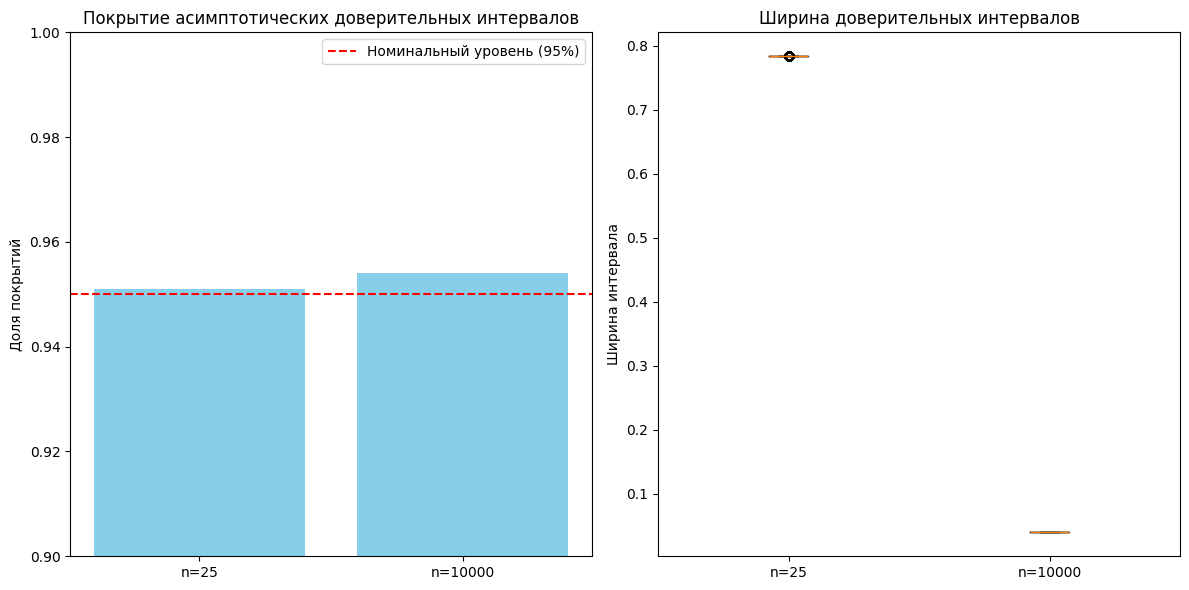

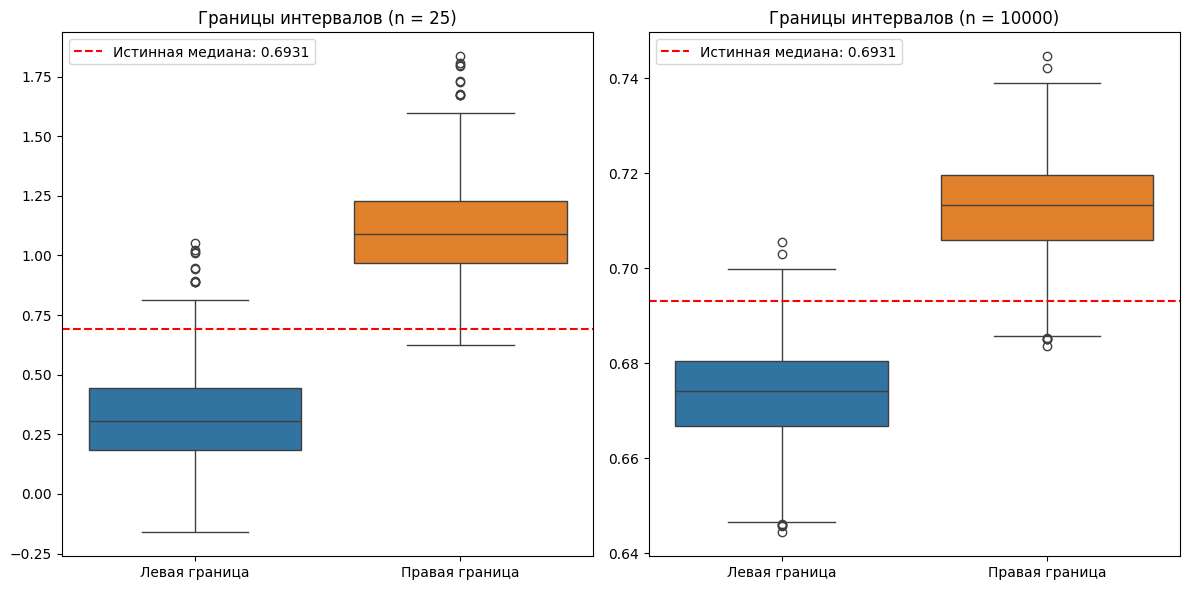

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

lambda_ = 1
true_median = np.log(2)
alpha = 0.05
z = norm.ppf(1 - alpha / 2)
n_experiments = 1000
sample_sizes = [25, 10000]

def run_median_experiment(n):
    coverages = 0
    lowers, uppers, widths = [], [], []

    for _ in range(n_experiments):
        X = np.random.exponential(scale=1/lambda_, size=n)
        m_hat = np.median(X)
        std_error = 1 / np.sqrt(n)

        ci_lower = m_hat - z * std_error
        ci_upper = m_hat + z * std_error

        lowers.append(ci_lower)
        uppers.append(ci_upper)
        widths.append(ci_upper - ci_lower)

        if ci_lower <= true_median <= ci_upper:
            coverages += 1

    coverage_prob = coverages / n_experiments
    bounds_df = pd.DataFrame({"Левая граница": lowers, "Правая граница": uppers})

    return coverage_prob, np.mean(widths), bounds_df, widths

results_median = []
for n in sample_sizes:
    coverage, avg_width, bounds_df, widths = run_median_experiment(n)
    results_median.append({
        "n": n,
        "Покрытие": coverage,
        "Средняя ширина": avg_width,
        "Границы": bounds_df,
        "Ширины": widths
    })

df_summary = pd.DataFrame({
    "n": [r["n"] for r in results_median],
    "Покрытие": [r["Покрытие"] for r in results_median],
    "Средняя ширина": [r["Средняя ширина"] for r in results_median]
})

print(df_summary)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar([f'n={r["n"]}' for r in results_median], [r["Покрытие"] for r in results_median], color='skyblue')
plt.axhline(y=0.95, color='red', linestyle='--', label='Номинальный уровень (95%)')
plt.title("Покрытие асимптотических доверительных интервалов")
plt.ylabel("Доля покрытий")
plt.ylim(0.9, 1.0)
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([r["Ширины"] for r in results_median], tick_labels=[f'n={r["n"]}' for r in results_median])
plt.title("Ширина доверительных интервалов")
plt.ylabel("Ширина интервала")

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=results_median[0]["Границы"], ax=ax1)
ax1.axhline(true_median, color='red', linestyle='--', label=f"Истинная медиана: {true_median:.4f}")
ax1.set_title(f"Границы интервалов (n = {results_median[0]['n']})")
ax1.legend()

sns.boxplot(data=results_median[1]["Границы"], ax=ax2)
ax2.axhline(true_median, color='red', linestyle='--', label=f"Истинная медиана: {true_median:.4f}")
ax2.set_title(f"Границы интервалов (n = {results_median[1]['n']})")
ax2.legend()

plt.tight_layout()
plt.show()


При обоих объёмах выборки доля интервалов, содержащих истинную медиану \\( m=\text{ln}2\approx0.6931 \\) составляет примерно 95%, что соответствует заявленному уровню доверия. Это подтверждает корректность использования ЦПТ и асимптотической нормальности при оценке медианы.

При увеличении выборки дисперсия оценки медианы уменьшается, интервал становится уже, а точность — выше.